## Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from scipy.optimize import approx_fprime
import random

from pylab import rcParams
rcParams['figure.figsize'] = 10, 7



## Generating datapoints for regression

Text(0, 0.5, 'Y')

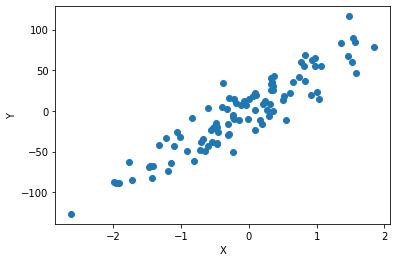

In [2]:
X,y=make_regression(n_samples=100,n_features=1,n_informative=1,noise=20,random_state=42)
plt.scatter(X,y)
plt.xlabel("X")
plt.ylabel("Y")


We will be using a simple linear regression thus we are looking find the optimale $\theta $ that minimizes the mean square error <br>
$\\ \dfrac{1}{p} \sum_{i=1}^{+p} (yTrue_i-yPred_i)^2 \ $ <br>
Where p is the number of samples

In [3]:
#Calculates MSE Given X, Y_true and theta
def MSE(data):
    X,Y_true,theta=data
    Y_pred=np.dot(X,theta)
    return np.sum((Y_true-Y_pred)**2)/X.shape[0]

In [4]:
#returns the gradient 
def Grad_function(X,Y_true,theta_loc):
    return approx_fprime([X,Y_true,theta_loc],MSE,epsilon=0.0001)[2]


In [5]:
#Performs batch gradient decent with T iterations and plots the evolution of MSE by number of iterations

def BatchGradientDecent(X,Y_true,theta_loc,T,learning_rate,plot=True):
    mse=[]
    thetas=[]
    for i in range(T):
        theta_loc=theta_loc-learning_rate*Grad_function(X,Y_true,theta_loc)
        mse.append(MSE([X,Y_true,theta_loc]))
        thetas.append(theta_loc)
    if plot:     
        plt.xlabel("Iterations")
        plt.ylabel("MSE")
        plt.title("Batch Gradient Decent")
        plt.plot(mse)
    return theta_loc,thetas


In [6]:
#Performs stochastic gradient decent with T iterations and plots the evolution of MSE by number of iterations

def StochasticGradientDecent(X,Y_true,theta_loc,T,learning_rate,plot=True):
    mse=[]
    thetas=[]
    for i in range(T):
            index=random.randint(0,len(Y_true)-1)
            theta_loc=theta_loc-learning_rate*Grad_function(X[index],Y_true[index],theta_loc)
            mse.append(MSE([X,Y_true,theta_loc]))
            thetas.append(theta_loc)
    if plot:
        plt.plot(mse)
        plt.xlabel("Iterations")
        plt.ylabel("MSE")
        plt.title("Stochastic Gradient Decent")
    return theta_loc,thetas

In [7]:
#Performs miniBatch gradient decent with T iterations and plots the evolution of MSE by number of iterations

def miniBatchGradientDecent(X,Y_true,theta_loc,T,learning_rate,batch_size,plot=True):
    mse=[]
    thetas=[]
    for i in range(T):
            x, y = zip(*random.sample(list(zip(X, Y_true)), batch_size))
            theta_loc=theta_loc-learning_rate*Grad_function(np.array(x),np.array(y),theta_loc)
            mse.append(MSE([X,Y_true,theta_loc]))
            thetas.append(theta_loc)
    if plot: 
        plt.plot(mse)
        plt.xlabel("Iterations")
        plt.ylabel("MSE")
    return theta_loc,thetas

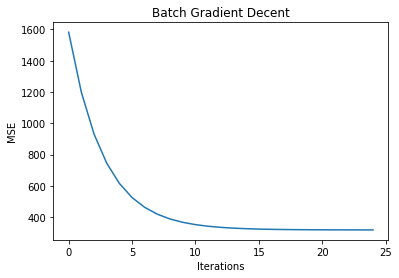

In [8]:
#Slower to converge
tetaFinal,thetasBatch=BatchGradientDecent(X,y,np.array([0]),25,0.1)

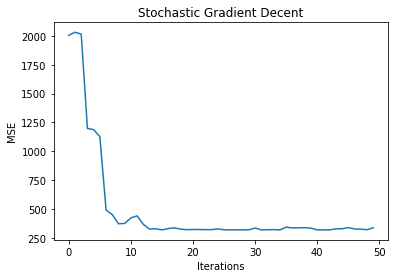

In [9]:
#Much faster to converge
tetaFinal,thetasStochastic=StochasticGradientDecent(X,y,np.array([0]),50,0.09)

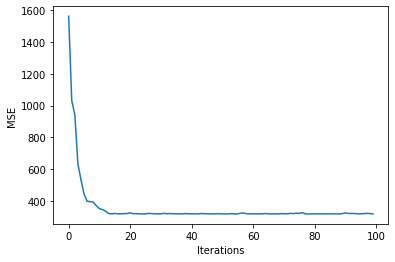

In [10]:

tetaFinal,thetasMiniBatch=miniBatchGradientDecent(X,y,np.array([0]),100,0.1,10)

In [26]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
plt.style.use('seaborn-pastel')
%matplotlib notebook

def plotLine(thetas,algoName):
    print(thetas[0])
    fig = plt.figure()
    ax = plt.axes(xlim=(-3,3), ylim=(-100, 100))
    line, = ax.plot([], [], lw=3)

    def init():
        line.set_data([], [])
        return line,
    def animate(i):
        line.set_data(X, np.dot(X,thetas[i]))
        plt.legend()

        return line,
    plt.scatter(X,y, marker='o',alpha=0.5)
    plt.title(algoName)

    return FuncAnimation(fig, animate, init_func=init,
                                   frames=30, interval=500, blit=True)
    




[85.25351588]


<IPython.core.display.Javascript object>


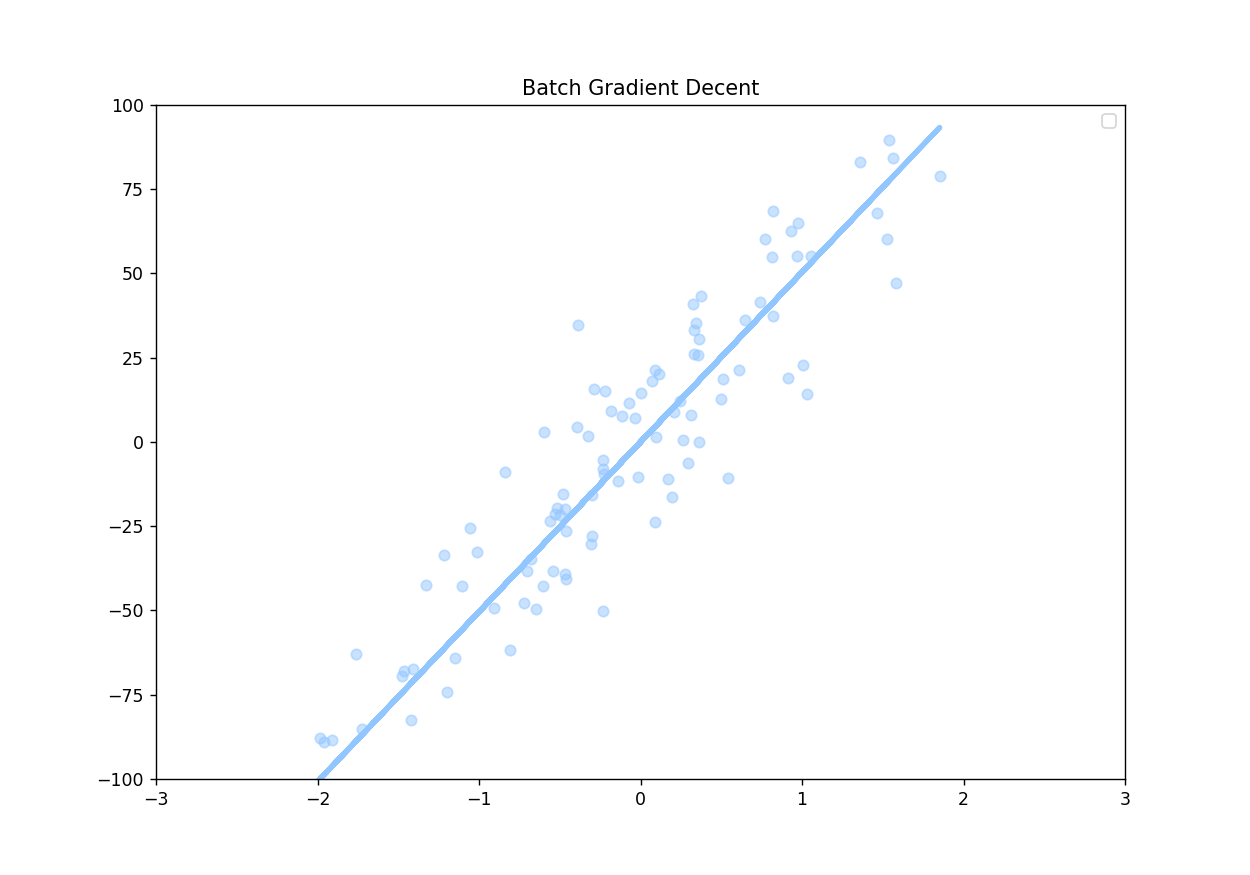

In [27]:
anim=plotLine(thetasBatch,"Batch Gradient Decent")


[1.68364872]


<IPython.core.display.Javascript object>


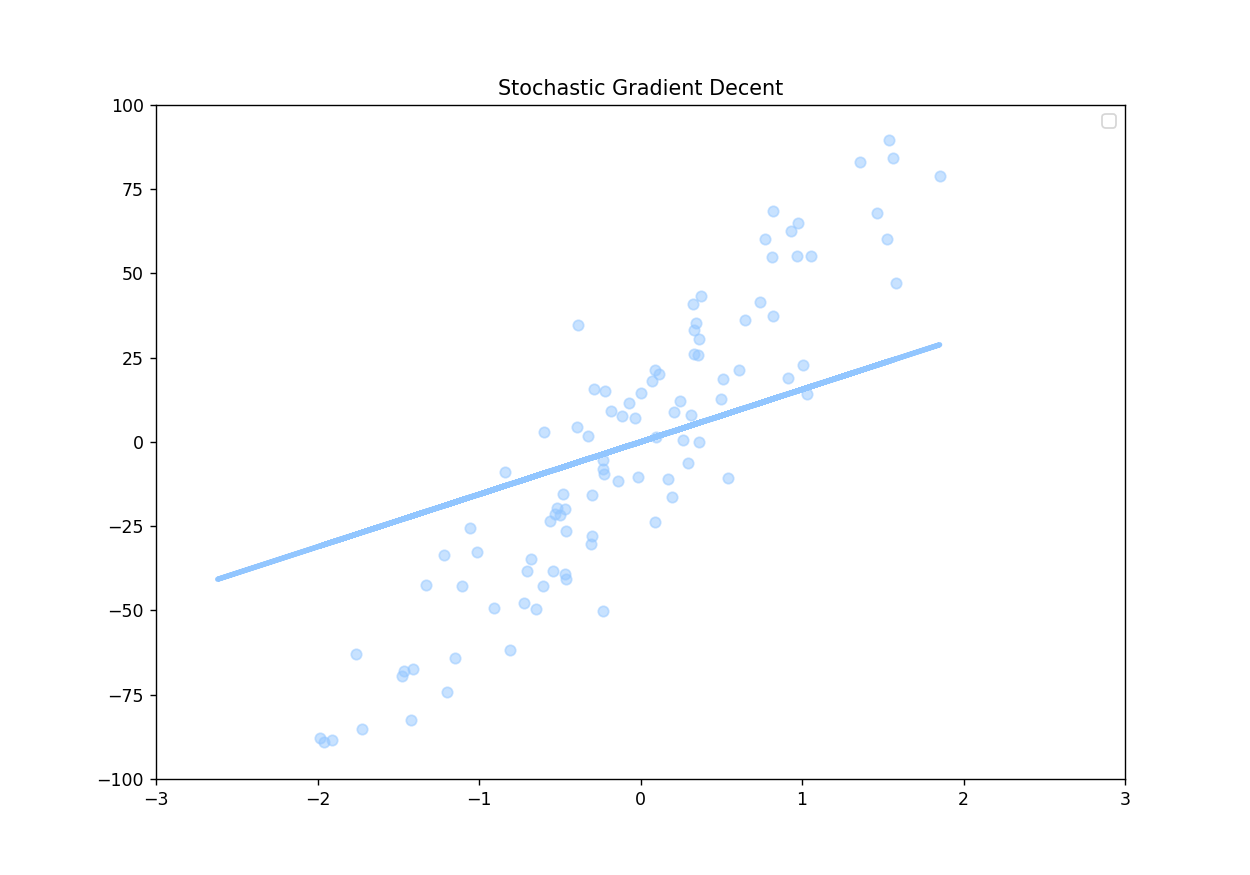

In [28]:
plotLine(thetasStochastic,"Stochastic Gradient Decent")

[8.05485592]


<IPython.core.display.Javascript object>


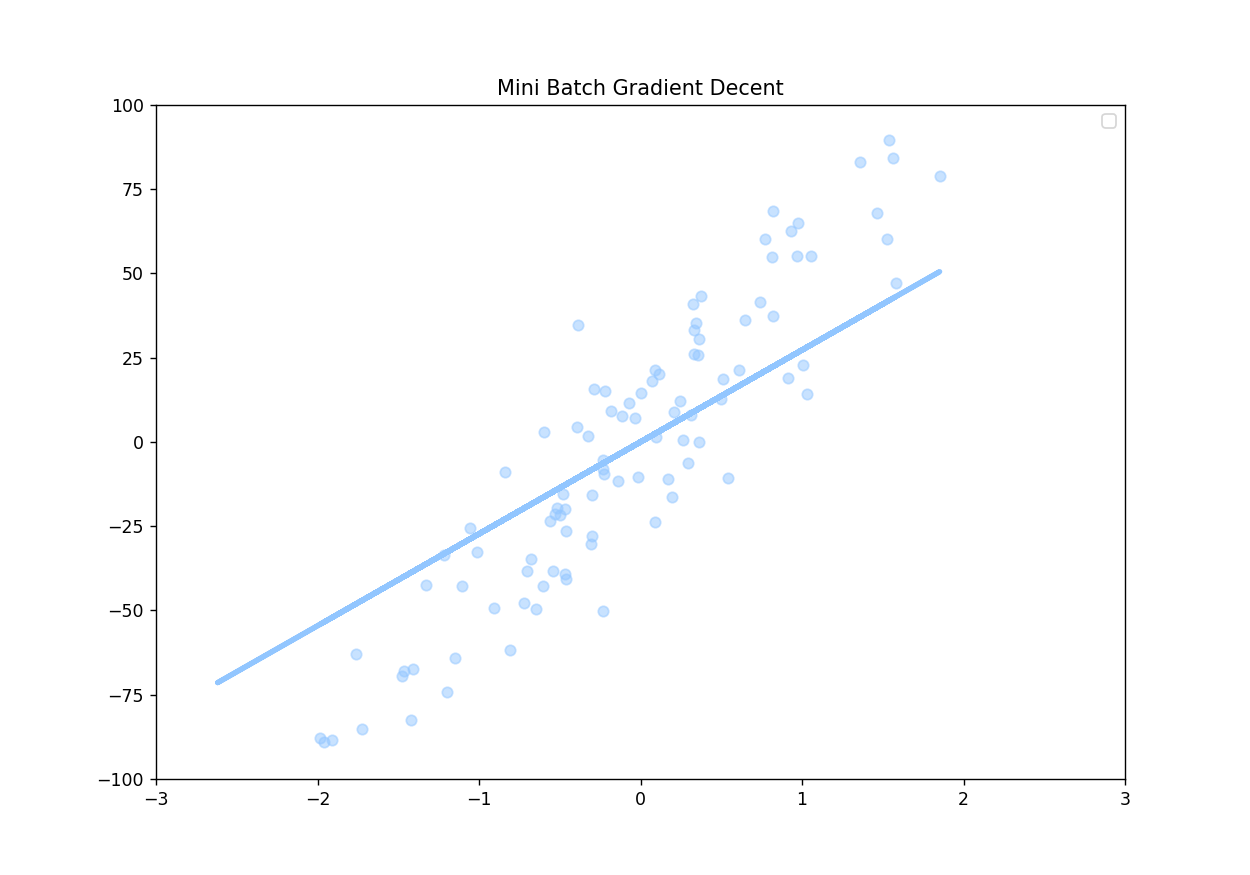

In [14]:
plotLine(thetasMiniBatch,"Mini Batch Gradient Decent")



In [30]:
def plotCurve(thetas,algoName):
    fig = plt.figure()
    ax = plt.axes(xlim=(-50,100), ylim=(0, 8000))
    point, = ax.plot(0,1, marker="o")

    def init():
        point.set_data([], [])
        return point,
    def animate(i):

        point.set_data(thetas[i], MSE([X,y,thetas[i]]))

        return point,

    tetas=np.linspace(start=-50,stop=100,num=500)
    mseResult=[MSE([X,y,np.array([teta])]) for teta in tetas]
    plt.plot(tetas,mseResult)
    plt.title(algoName)
    return  FuncAnimation(fig, animate, init_func=init,
                               frames=30, interval=500, blit=True)
    
    



<IPython.core.display.Javascript object>


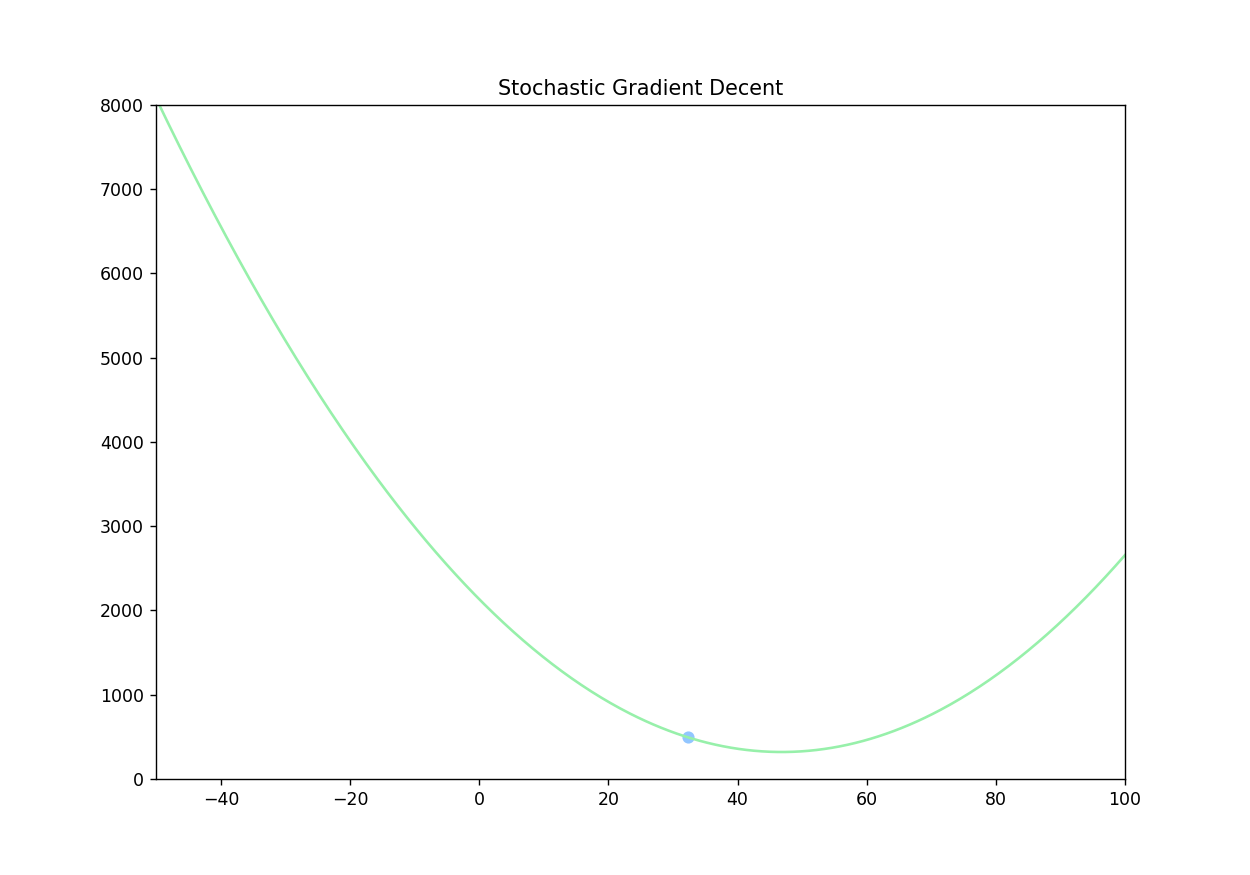

In [31]:
anim=plotCurve(thetasStochastic,"Stochastic Gradient Decent")

<IPython.core.display.Javascript object>


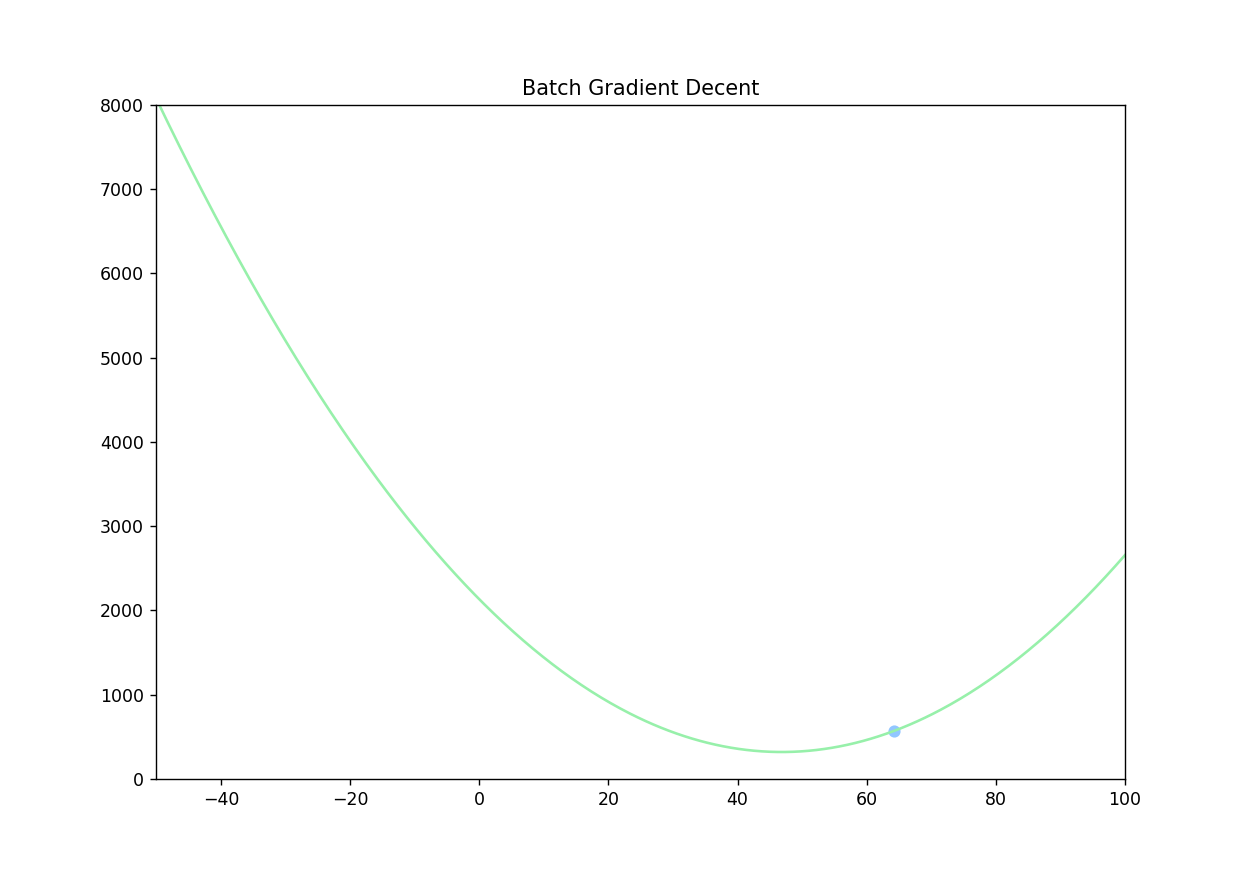

In [32]:
plotCurve(thetasBatch,"Batch Gradient Decent")


<IPython.core.display.Javascript object>


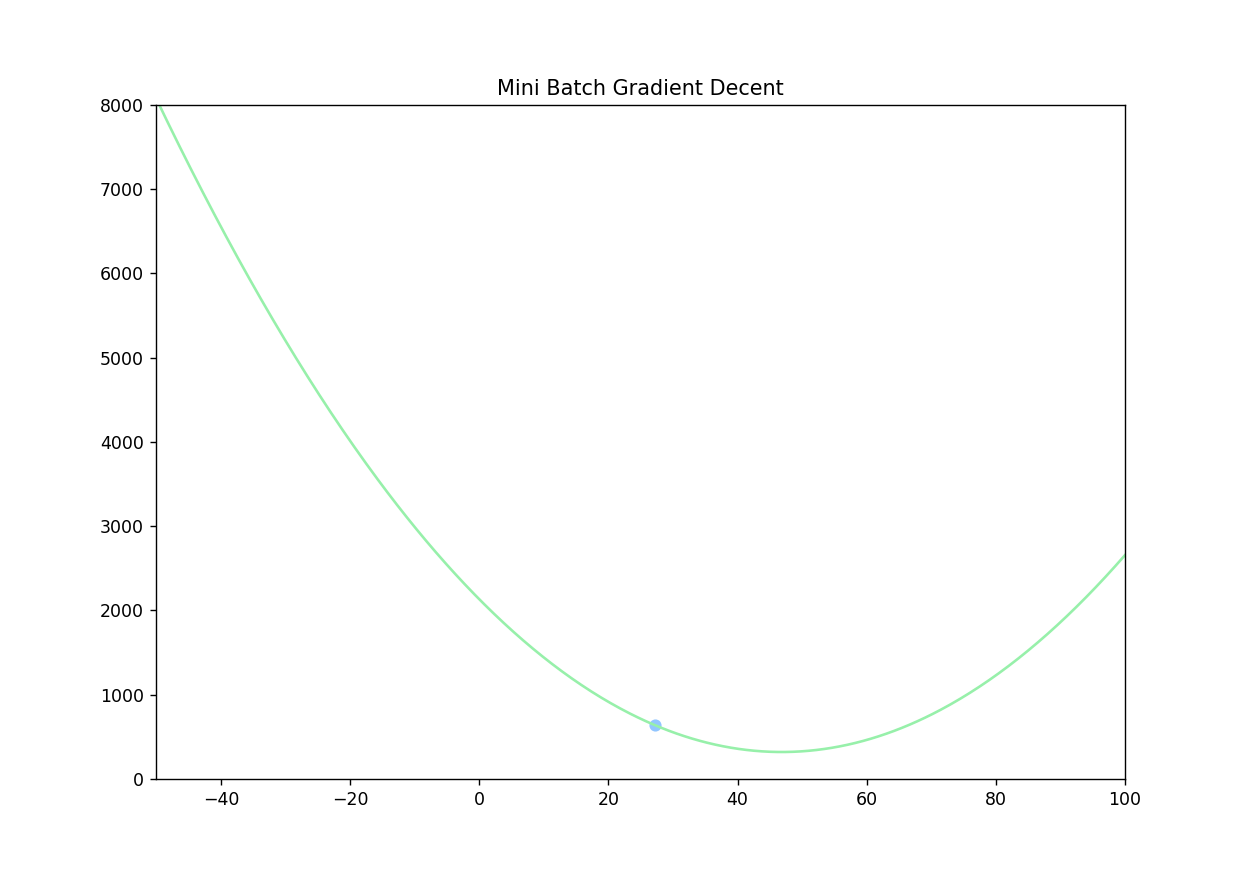

In [33]:
plotCurve(thetasMiniBatch,"Mini Batch Gradient Decent")


<IPython.core.display.Javascript object>


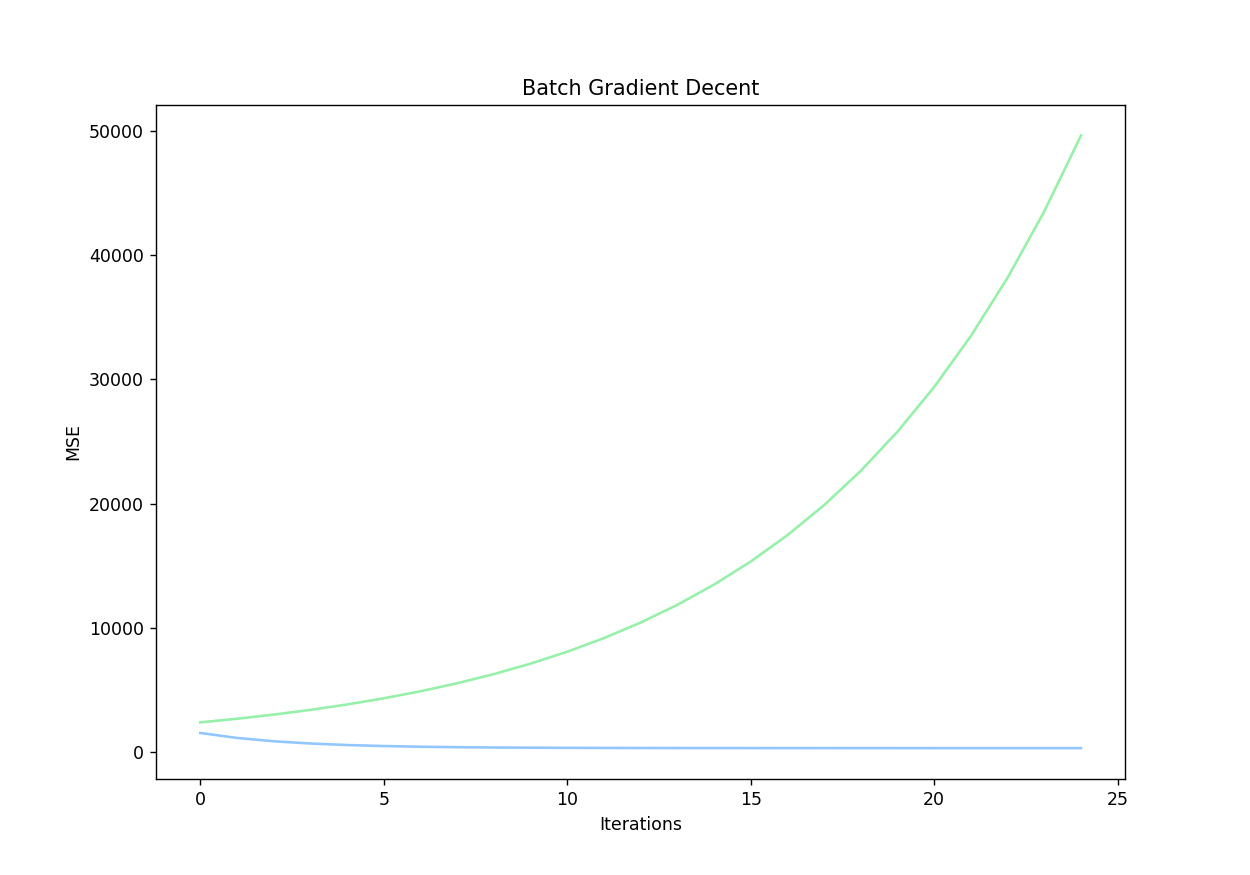

<IPython.core.display.Javascript object>


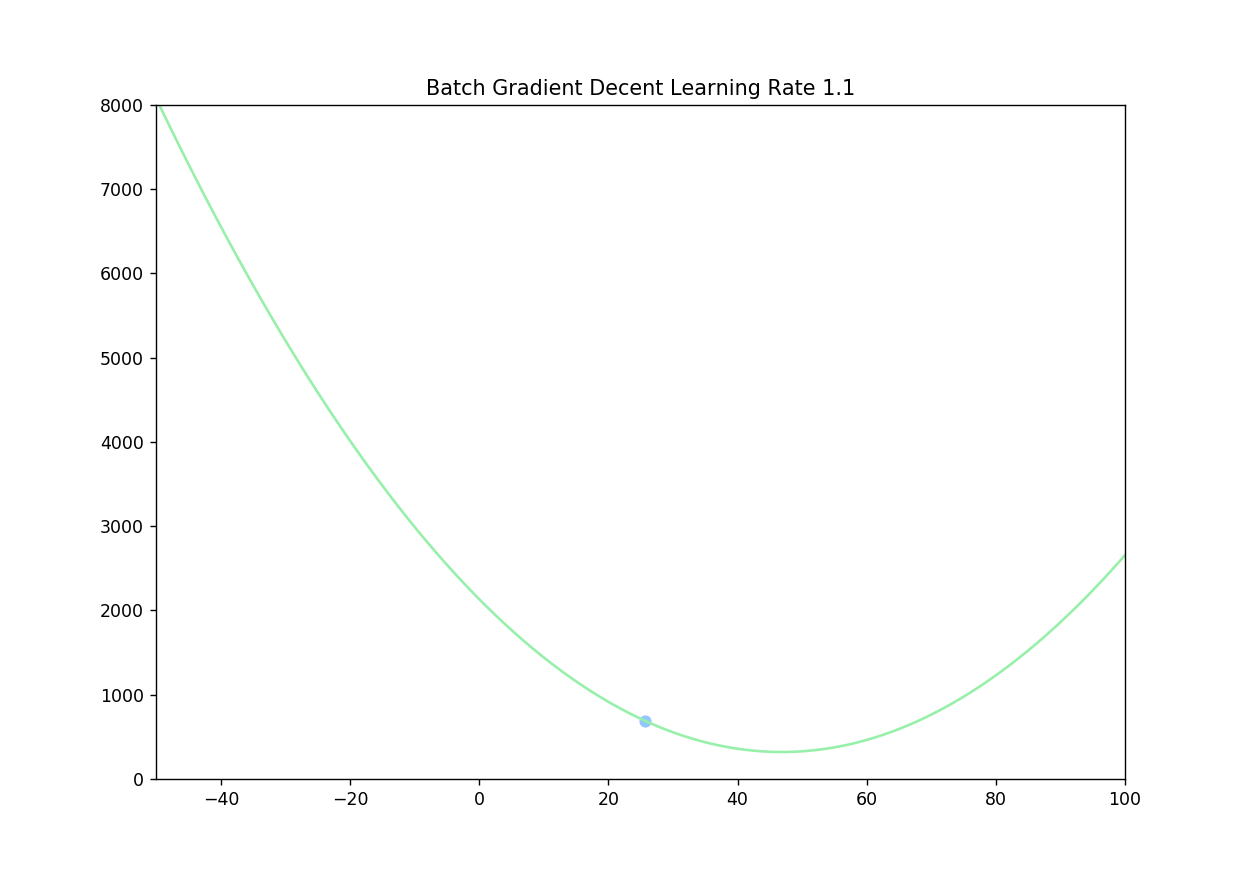

In [34]:
#Big learning rate
tetaFinal,thetasBatch=BatchGradientDecent(X,y,np.array([0]),25,1.1)
plotCurve(thetasBatch,"Batch Gradient Decent Learning Rate 1.1")


<IPython.core.display.Javascript object>


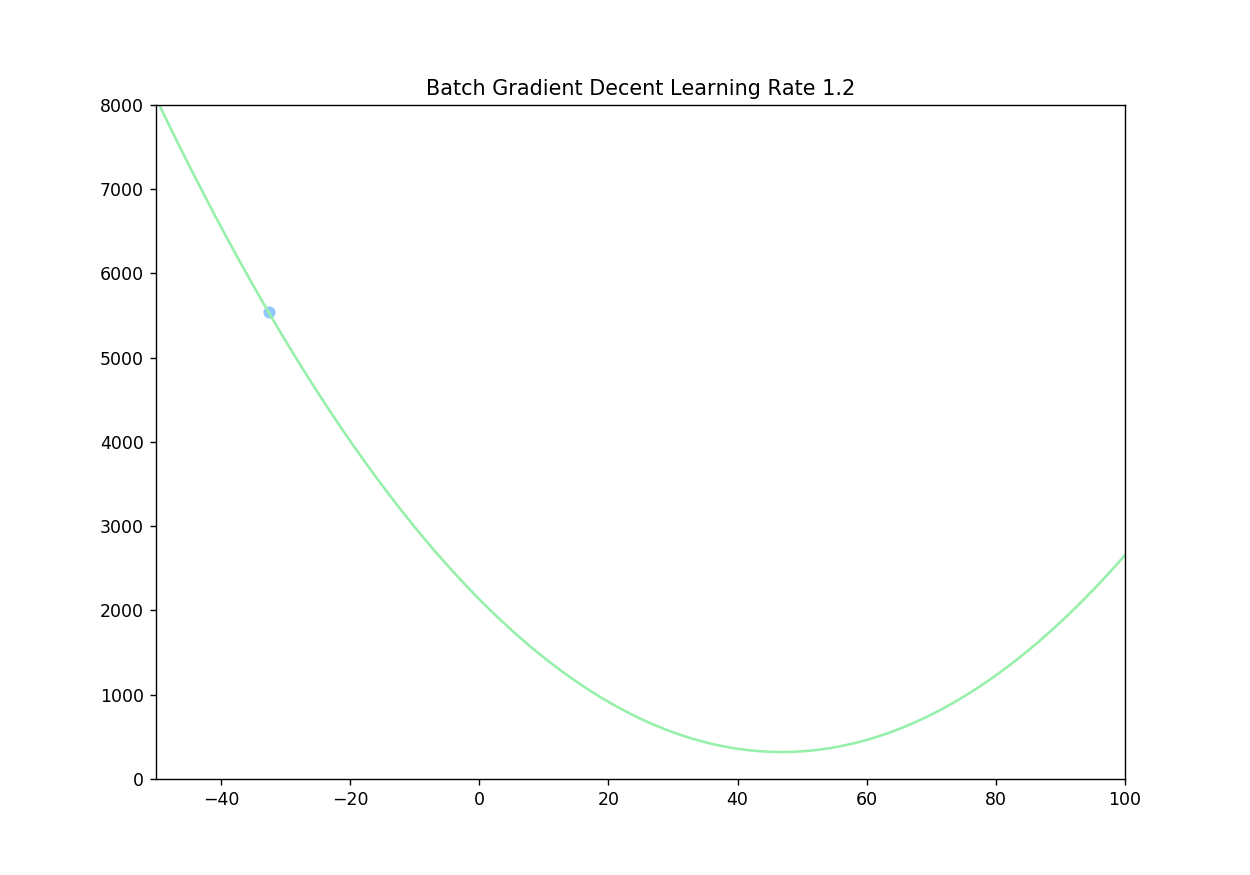

In [35]:
#Big learning rate
tetaFinal,thetasBatch=BatchGradientDecent(X,y,np.array([0]),25,1.25)
plotCurve(thetasBatch,"Batch Gradient Decent Learning Rate 1.2")
